# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>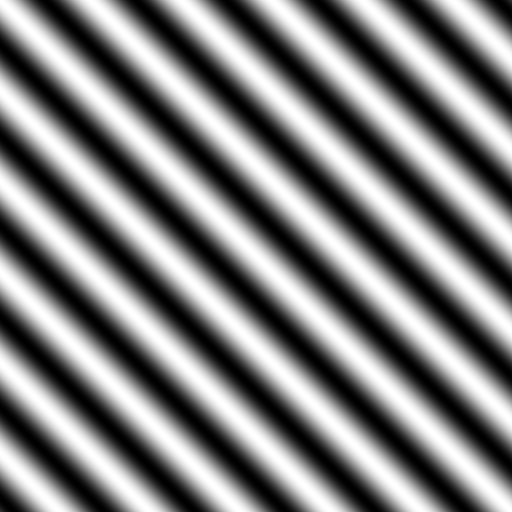</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
# %matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


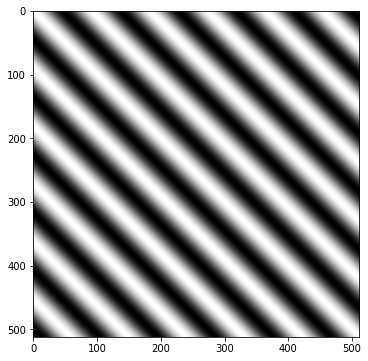

In [2]:
s_continue = sinusoid2d(1, 45, 512, 64, 1)
imshow(s_continue)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

\begin{align*}
    s_\theta(t,u) &= A\cos(2\pi f_0(t\cos\theta + u\sin\theta)) \\
        &= A\cos(2\pi (f_0 t\cos\theta + f_0 u\sin\theta)) \\
\end{align*}
On se trouve donc avec $ f_0 \cos \theta $ pour l'axe $ t $ et $ f_0 \sin \theta $. Dans notre cas $ \theta = \frac{\pi }{4} \Leftrightarrow \cos \theta = \sin \theta = \frac{\sqrt[]{2}}{2} $ donc 
$$
    f_m = \max (f_t^{max}, f_u^{max}) = \max (\frac{1}{64}* \frac{\sqrt[]{2}}{2}, \frac{1}{64}* \frac{\sqrt[]{2}}{2}) = \frac{1}{64}* \frac{\sqrt[]{2}}{2} = \frac{\sqrt[]{2}}{128}
$$
Ainsi d'après le théorème de Shannon, on a
$$
f_e \geq 2f_m \Leftrightarrow f_e \geq \frac{\sqrt[]{2}}{64}
$$

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

0.011048543456039808
0.011048543456039806


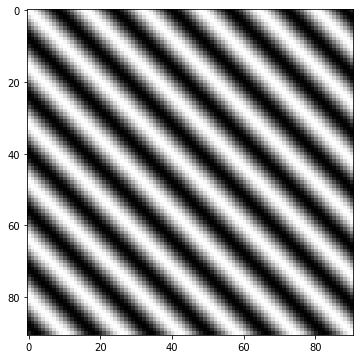

In [3]:
f0 = 1/64
f_max_t = np.cos(np.pi/4)*f0
f_max_u = np.sin(np.pi/4)*f0
f_m = max(f_max_t, f_max_u)
print(f_m)
print(np.sqrt(2)/128)
T0 = 1/(16*f_m)
s = sinusoid2d(1, 45, 512, 64, T0)
imshow(s)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

In [4]:
from numpy.fft import fftshift
def plotFT(signal, **kwargs):
    a = fftshift(np.abs(fft2(signal)))
    a = np.where(a>10000, 0, a)
    surf(a, **kwargs)

def plotLogFT(signal, **kwargs):
    centeredFT = fftshift(np.abs(fft2(signal)))
    a = np.log(1 + np.abs(centeredFT))
    # a = np.where(a>10000, 0, a)
    surf(a, **kwargs)

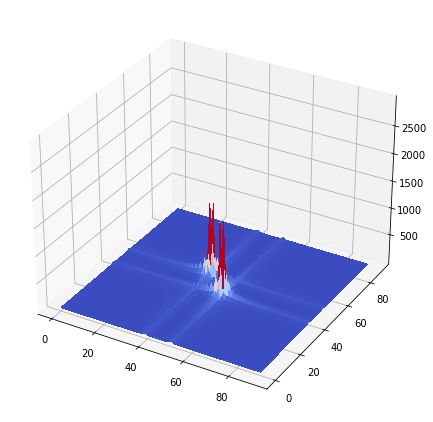

In [5]:
plotFT(s)

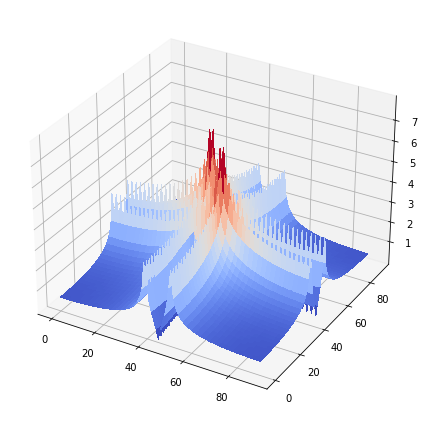

In [6]:
plotLogFT(s)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

**Le plot continue**

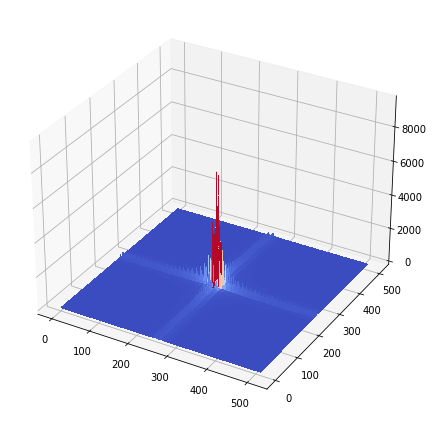

In [7]:
plotFT(s_continue)

**Plot en faisant varier $T_0$**

45.25483399593903


/tmp/ipykernel_1118/200332644.py:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


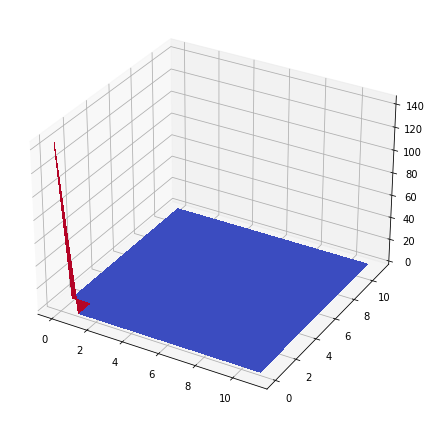

22.627416997969515


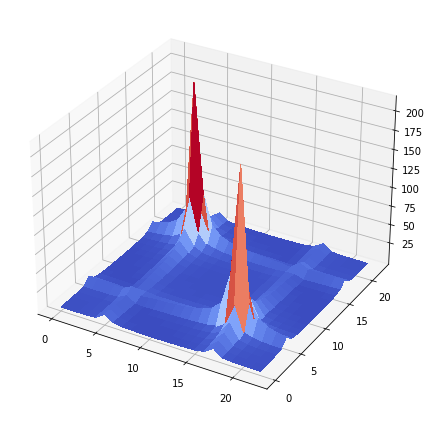

11.313708498984758


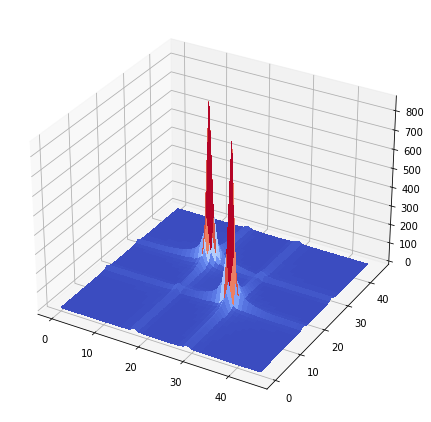

5.656854249492379


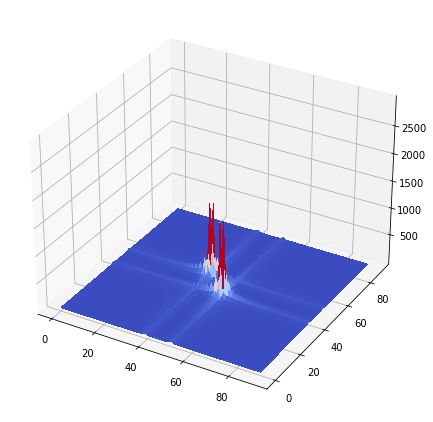

2.8284271247461894


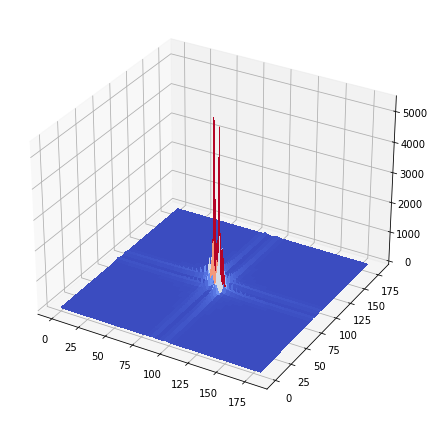

In [8]:
for k in [2, 4, 8, 16, 32]:
    T0 = 1/(k*f_m)
    print(T0)
    s = sinusoid2d(1, 45, 512, 64, T0)
    plotFT(s, title=f"{k} * f_m")

**CCL**

On peut voir que la résolution du plot de la FFT incrémente plus $T_0$ décrois. C'est normale car la FFT nous renvoie le même nombre de point que ce qu'on lui donne. 

Pour contrer cela on pourrai rajouter des zeros à la liste. Ils ne modifieront pas les fréquences mais vont permette d'en afficher plus.

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

In [9]:
f_m = np.sqrt(2)/128
T0 = 1/(4*f_m)
s = sinusoid2d(1, 45, 512, 64, T0)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [10]:
def error(signal, reconstructed_signal, A=1, L=512):
    s =0
    for k in range(L):
        for l in range(L):
            s += np.abs(reconstructed_signal[k,l] - signal[k,l])
    return 1/(2*A*L**2) * s

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

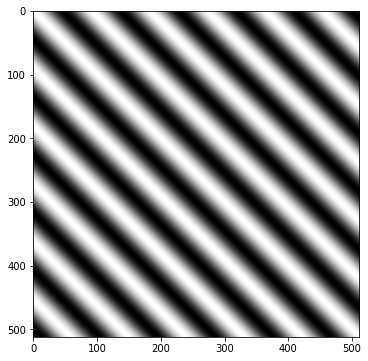

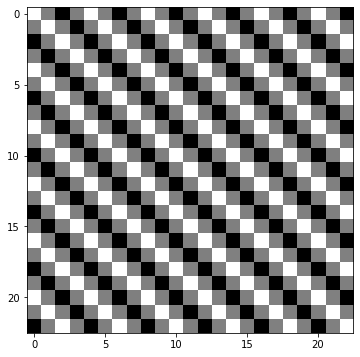

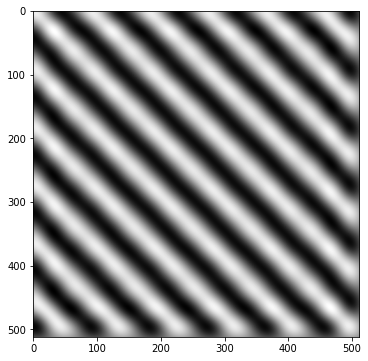

'Erreur :'

0.022936924363102625

In [11]:
f_m = np.sqrt(2)/128
T0 = 1/(4*f_m)
s = sinusoid2d(1, 45, 512, 64, 1)
s_sampled = sinusoid2d(1, 45, 512, 64, T0)
r_signal = shannonInterpolation(s_sampled, T0, 512)
imshow(s)
imshow(s_sampled)
imshow(r_signal)
display("Erreur :",error(s, r_signal))

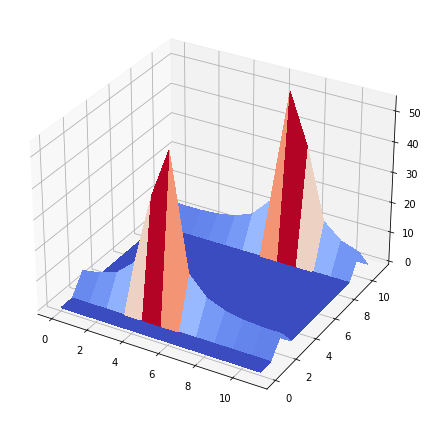

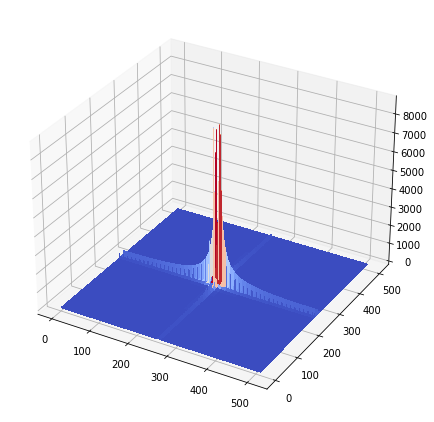

In [19]:
plotFT(s_sampled)
plotFT(s)

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

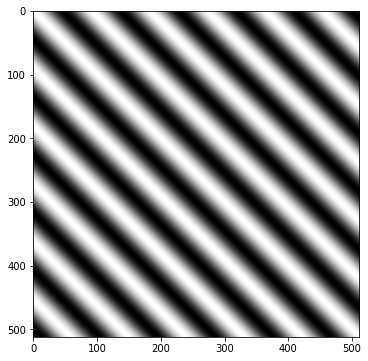

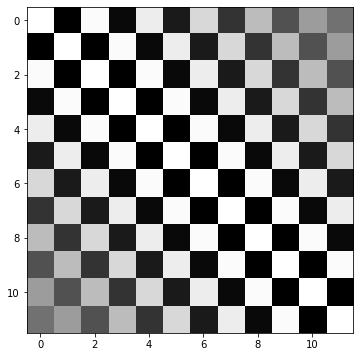

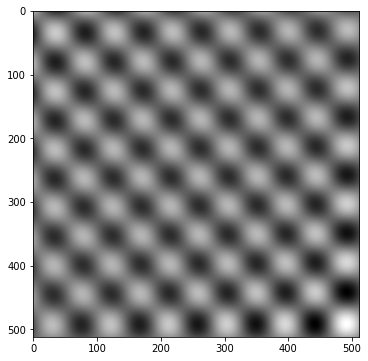

'Erreur :'

0.18564693459923587

In [20]:
T0 = 1/(1.5*f_m)
s = sinusoid2d(1, 45, 512, 64, 1)
s_sampled = sinusoid2d(1, 45, 512, 64, T0)
r_signal = shannonInterpolation(s_sampled, T0, 512)
imshow(s)
imshow(s_sampled)
imshow(r_signal)
display("Erreur :",error(s, r_signal))

On peut voir que l'image est mal reconstruite, il y a une perte d'information.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

\begin{align*}
    s_\theta(t,u) &= A\cos(2\pi f_0(t\cos\theta + u\sin\theta)) \\
        &= A\cos(2\pi (f_0 t\cos\theta + f_0 u\sin\theta)) \\
\end{align*}
On se trouve donc avec $ f_0 \cos \theta $ pour l'axe $ t $ et $ f_0 \sin \theta $. Dans notre cas $ \theta = \frac{\pi}{18} \Leftrightarrow \cos \theta \approx 0.98, \sin \theta \approx 0.17 $ donc 
$$
    f_m = \max (f_t^{max}, f_u^{max}) = \max (\frac{1}{64}* \cos \theta, \frac{1}{64}* \sin \theta) = \frac{1}{64}* \cos \theta \approx 0.0153876211
$$
Ainsi d'après le théorème de Shannon, on a
$$
f_e \geq 2f_m \Leftrightarrow f_e \geq \frac{\cos \theta}{32}
$$

0.01538762114081575
0.01538762114081575


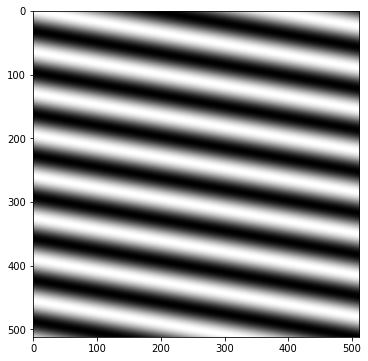

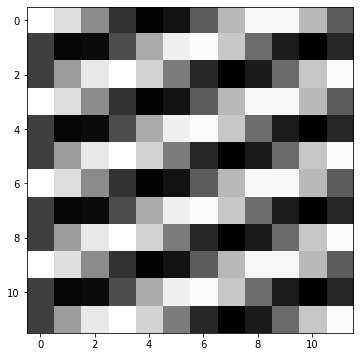

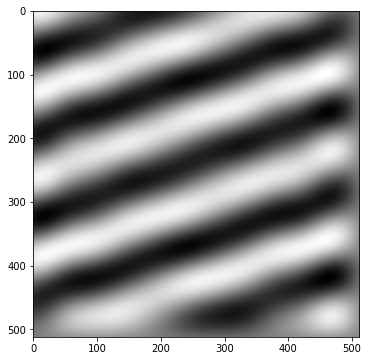

'Erreur :'

0.39823907474393355

In [14]:
f0 = 1/64
f_max_t = np.cos(10*np.pi/180)*f0
f_max_u = np.sin(10*np.pi/180)*f0
f_m = max(f_max_t, f_max_u)
print(f_m)
print(np.cos(np.pi/18)/64)


T0 = 1/(1.5*f_m)
s = sinusoid2d(1, 10, 512, 64, 1)
s_sampled = sinusoid2d(1, 10, 512, 64, T0)
r_signal = shannonInterpolation(s_sampled, T0, 512)
imshow(s)
imshow(s_sampled)
imshow(r_signal)
display("Erreur :",error(s, r_signal))

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [15]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below



## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

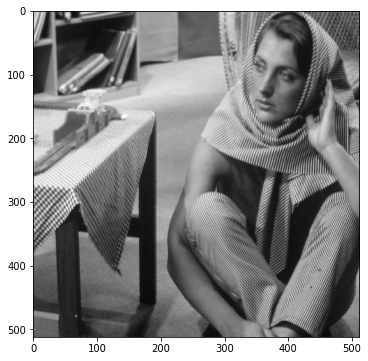

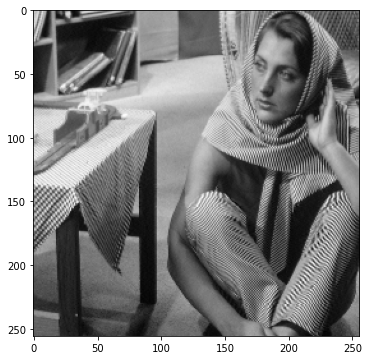

In [16]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

imshow(barbara)
imshow(subSample2(barbara))

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Le subsample ne garde qu'un pixel sur deux. En retirant des pixels, on perd de l'information, on perd certaine fréquence. Ainsi, cela créé de l'aliasing sur l'image.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

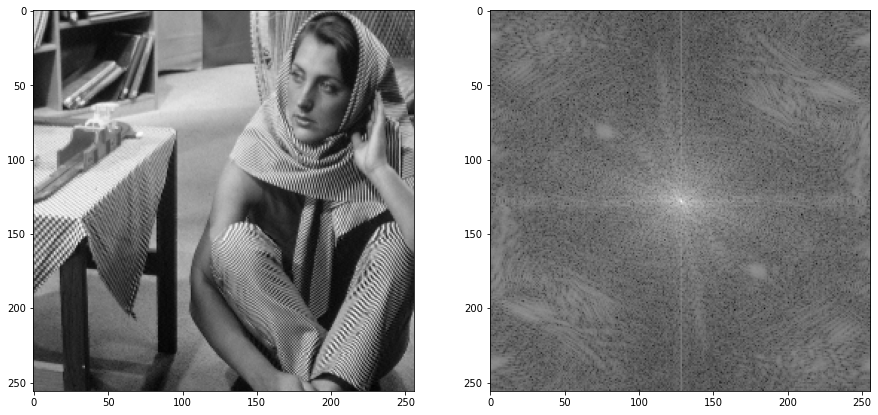

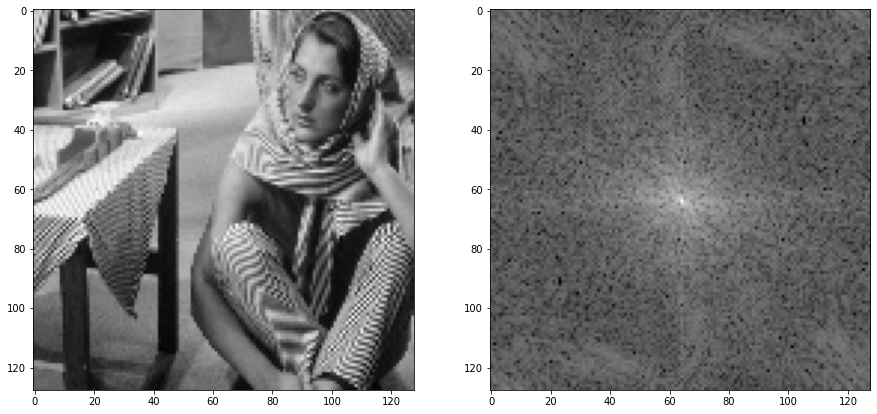

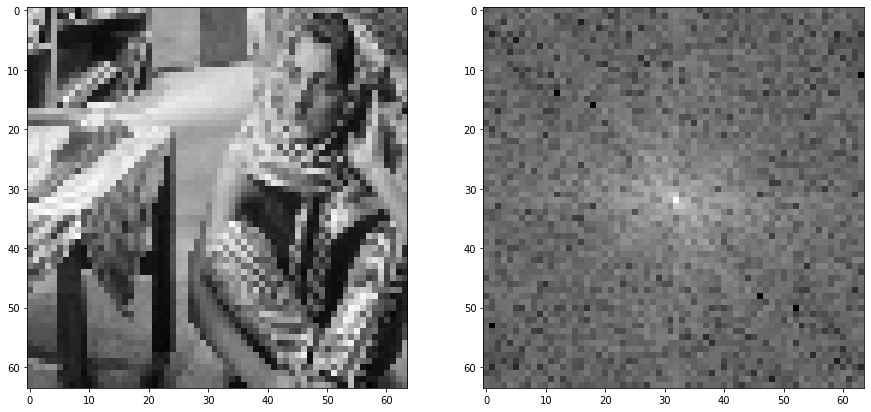

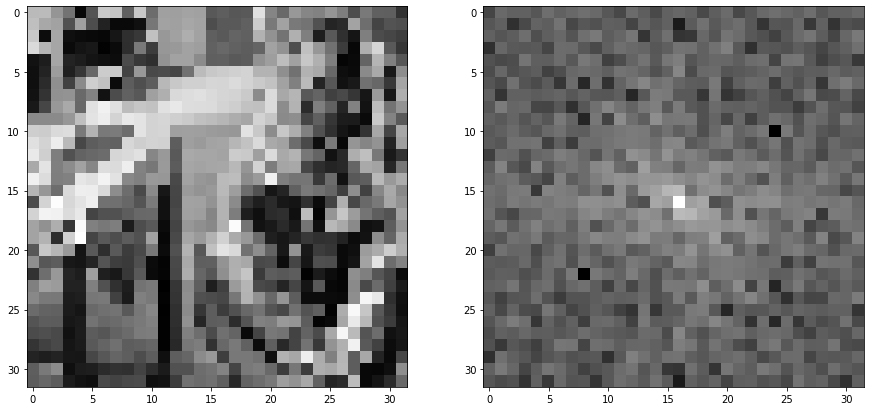

In [17]:
barbara_aliasing = barbara.copy()
for i in range(4):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    barbara_aliasing = subSample2(barbara_aliasing)
    ax[0].imshow(barbara_aliasing)

    centeredFT = fftshift(fft2(barbara_aliasing))
    a = np.log(1 + np.abs(centeredFT))
    a = np.where(a>1000, 0, a)
    ax[1].imshow(a)

3. Bonus question: same question with the image `img/mandrill.png`.

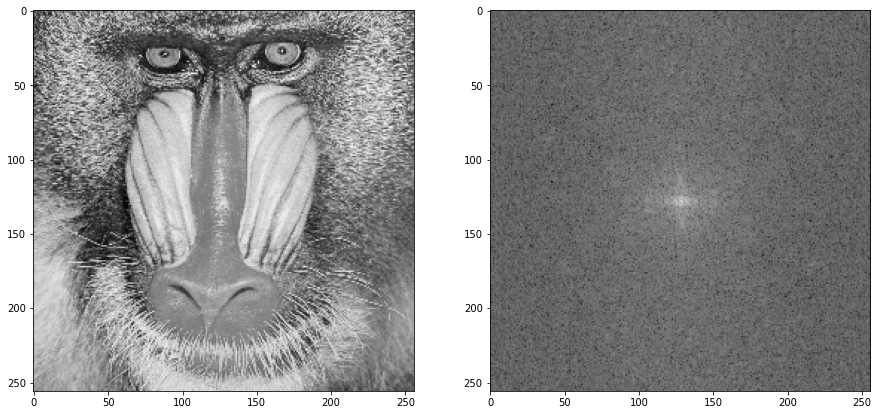

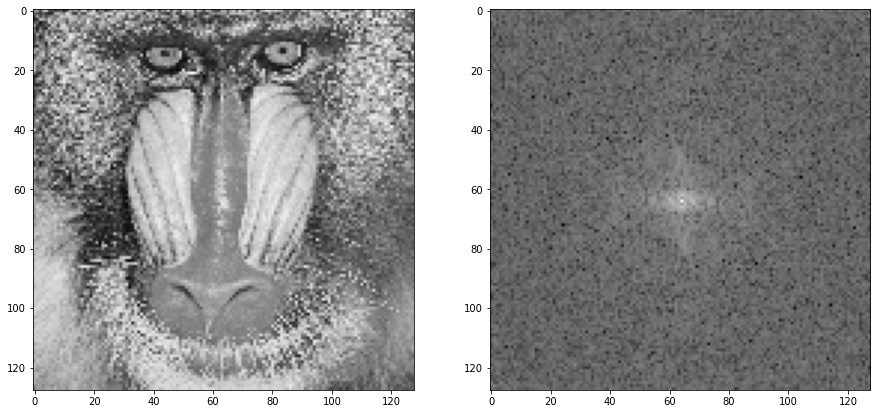

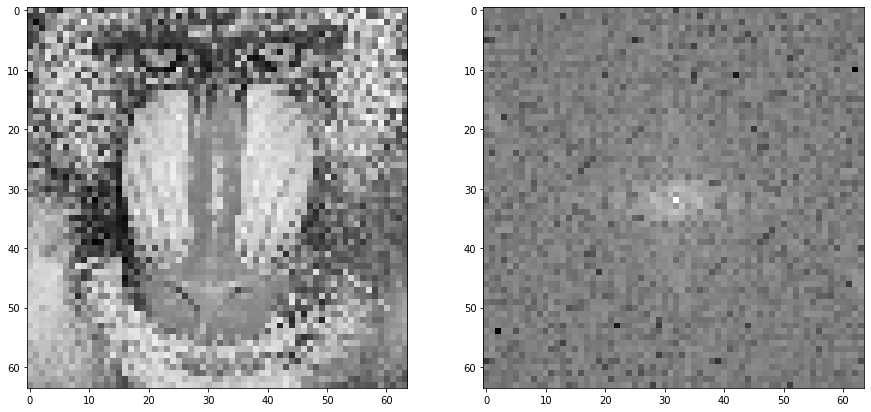

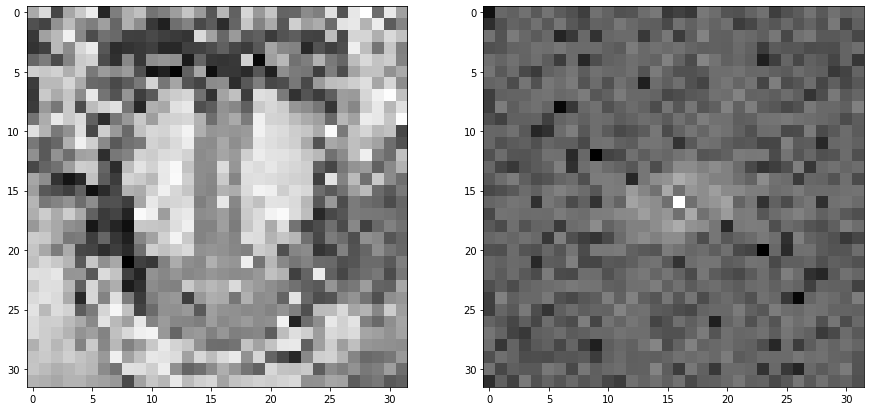

In [18]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
mandrill_aliasing = mandrill.copy()
for i in range(4):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15))
    mandrill_aliasing = subSample2(mandrill_aliasing)
    ax[0].imshow(mandrill_aliasing)

    centeredFT = fftshift(fft2(mandrill_aliasing))
    a = np.log(1 + np.abs(centeredFT))
    a = np.where(a>1000, 0, a)
    ax[1].imshow(a)
